<a href="https://colab.research.google.com/github/nikfed280199/anime_recommendation/blob/main/course_project(test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Построение рекомендательной системы

---



Теория:


1.   Алгоритмы прогнозирования рекомендаций для новых пользователей - http://data4.ru/timearrima
2.   Прогнозирование временных рядов с помощью рекуррентных нейронных сетей - https://habr.com/ru/post/495884/
3.   10 лайфхаков разработки рекомендательных систем - https://habr.com/ru/post/476224/
4.   Алгоритмы решения временных рядов в прогнозировании - https://habr.com/ru/post/477206/
5.   Курсовая работа "Формирование персонализированного предложения на основе личных предпочтений клиента" - https://core.ac.uk/download/pdf/153543262.pdf
6.   Магистерская диссертация - https://dspace.spbu.ru/bitstream/11701/11643/1/diplom_chernobay.pdf
7.   Анатомия рекомендательных систем. Часть первая - https://habr.com/ru/company/lanit/blog/420499/
8.   Темы курсовых и дипломных работ под руководством сотрудников кафедры технологий моделирования сложных систем:https://cs.hse.ru/tmsyst/oldprojects
9.   Что такое дерево решений и где его используют? - https://habr.com/ru/company/productstar/blog/523044/

Практика:


1.   Пример построения прогноза - https://ru.coursera.org/lecture/data-analysis-applications/primier-postroieniia-proghnoza-rnCnt
2.   Рекомендательные системы для Netflix - http://rstudio-pubs-static.s3.amazonaws.com/505493_96a81a4275214c838913c48575a354fa.html
3.   Разработка рекомендательной системы на основе извлечения и анализа интересов пользователей - https://dspace.spbu.ru/bitstream/11701/11643/1/diplom_chernobay.pdf


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

anime = pd.read_csv("/content/drive/MyDrive/Курс 3/Семестр6/CourseProject/asd/anime.csv")
rating = pd.read_csv("/content/drive/MyDrive/Курс 3/Семестр6/CourseProject/asd/rating.csv")

In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [ ]:
anime.shape, rating.shape

((12294, 7), (7813737, 3))

Количество пользователей и аниме

In [ ]:
n_users = rating.user_id.unique().shape[0]
n_items = rating.anime_id.unique().shape[0]
n_users, n_items 

(73515, 11200)

In [ ]:
anime.shape, rating.shape

((12294, 7), (7813737, 3))

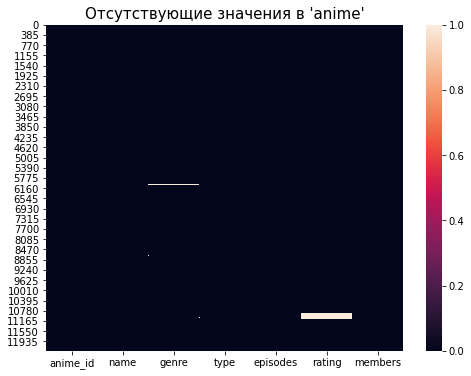

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(anime.isnull())
plt.title("Отсутствующие значения в 'anime'", fontsize = 15)
plt.show()

Из этого графика видно, что в столбцах "genre" и "rating" отсутствуют некоторые значения. Давайте рассмотрим их.

In [ ]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
anime.type.value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime.fillna({'rating':0},inplace=True)
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime.rating.value_counts()

0.00    230
6.00    141
7.00     99
6.50     90
6.25     84
       ... 
3.35      1
3.14      1
3.28      1
8.66      1
9.15      1
Name: rating, Length: 599, dtype: int64

In [ ]:
anime.isnull().sum()

anime_id     0
name         0
genre       62
type        25
episodes     0
rating       0
members      0
dtype: int64

In [ ]:
anime.type.value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

Заполним пустые поля значением "TV", т.к. она является чаще всего встречающимся значением.

In [ ]:
anime.fillna({'type':"TV"},inplace=True)
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime.type.value_counts()

TV         3812
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [ ]:
anime.isnull().sum()

anime_id     0
name         0
genre       62
type         0
episodes     0
rating       0
members      0
dtype: int64

In [ ]:
anime.genre.value_counts()

Hentai                                                               823
Comedy                                                               523
Music                                                                301
Kids                                                                 199
Comedy, Slice of Life                                                179
                                                                    ... 
Action, Comedy, Ecchi, School, Shounen, Super Power, Supernatural      1
Fantasy, Magic, Music, Romance, School, Sci-Fi, Shoujo                 1
Adventure, Historical, Samurai, Shounen                                1
Adventure, Samurai, Sci-Fi, Shounen                                    1
Action, Adventure, Comedy, Harem, Mecha, Sci-Fi                        1
Name: genre, Length: 3264, dtype: int64

Можно выбросить колонку "genre", т.к. как-то оптимально и правильно заполнить его очень сложно, даже если это возможно. Но давайте просто заполним пустые поля значением "Unknown".

In [ ]:
anime.fillna({'genre':"Unknown"},inplace=True)
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

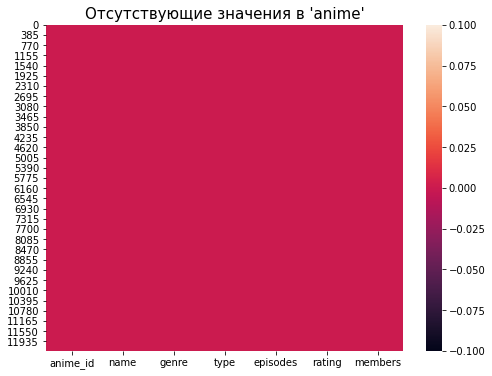

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(anime.isnull())
plt.title("Отсутствующие значения в 'anime'", fontsize = 15)
plt.show()

Как видим все заполнилось, но давайте глубже проанализируем, т.к. могут быть значения, которые нам не будут удовлетворять.

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Начнем с категориальных колонок ("object").

In [ ]:
categorical_columns = [x for x in anime.columns if anime[x].dtype == 'object']
categorical_columns

['name', 'genre', 'type', 'episodes']

In [ ]:
anime.name.value_counts()

Saru Kani Gassen                               2
Shi Wan Ge Leng Xiaohua                        2
X                                              1
Secret Journey                                 1
Ryou Seibai!: Gakuen Bishoujo Seisai Hiroku    1
                                              ..
Shin Kachikachi Yama                           1
Eddie the Fast Break                           1
Fen Qing                                       1
Kanojo wa Dare to demo Sex Suru.               1
Hakuouki Movie 2: Shikon Soukyuu               1
Name: name, Length: 12292, dtype: int64

In [ ]:
anime.genre.value_counts()

Hentai                                                       823
Comedy                                                       523
Music                                                        301
Kids                                                         199
Comedy, Slice of Life                                        179
                                                            ... 
Action, Drama, Mecha, Military, Police, Sci-Fi, Shounen        1
Adventure, Comedy, Drama, Martial Arts, Samurai, Shounen       1
Action, Comedy, Martial Arts, Seinen                           1
Mystery, Psychological, Supernatural, Thriller                 1
Action, Demons, Ecchi, Horror, Mecha, Sci-Fi, Super Power      1
Name: genre, Length: 3265, dtype: int64

In [ ]:
anime.type.value_counts()

TV         3812
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [ ]:
anime = pd.get_dummies(anime, columns=['type'])
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      12294 non-null  int64  
 1   name          12294 non-null  object 
 2   genre         12294 non-null  object 
 3   episodes      12294 non-null  object 
 4   rating        12294 non-null  float64
 5   members       12294 non-null  int64  
 6   type_Movie    12294 non-null  uint8  
 7   type_Music    12294 non-null  uint8  
 8   type_ONA      12294 non-null  uint8  
 9   type_OVA      12294 non-null  uint8  
 10  type_Special  12294 non-null  uint8  
 11  type_TV       12294 non-null  uint8  
dtypes: float64(1), int64(2), object(3), uint8(6)
memory usage: 648.4+ KB


In [ ]:
anime.head()

,anime_id,name,genre,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,9.37,200630,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26,793665,0,0,0,0,0,1
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.25,114262,0,0,0,0,0,1
3,9253,Steins;Gate,"Sci-Fi, Thriller",24,9.17,673572,0,0,0,0,0,1
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.16,151266,0,0,0,0,0,1


In [ ]:
anime.episodes.value_counts()

1      5677
2      1076
12      816
13      572
26      514
       ... 
193       1
113       1
67        1
358       1
694       1
Name: episodes, Length: 187, dtype: int64

In [ ]:
for i in range(len(anime.episodes)):
  if anime.episodes[i] == 'Unknown':
    anime.episodes[i] = 0
anime.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,anime_id,name,genre,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
12284,26031,Super Erotic Anime,Hentai,2,4.45,118,0,0,0,1,0,0
12285,34399,Taimanin Asagi 3,"Demons, Hentai, Supernatural",0,0.00,485,0,0,0,1,0,0
12286,10368,Teleclub no Himitsu,Hentai,2,4.67,148,0,0,0,1,0,0
12287,9352,Tenshi no Habataki Jun,Hentai,1,4.33,201,0,0,0,1,0,0
12288,5541,The Satisfaction,Hentai,1,4.37,166,0,0,0,1,0,0
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,1,4.15,211,0,0,0,1,0,0
12290,5543,Under World,Hentai,1,4.28,183,0,0,0,1,0,0
12291,5621,Violence Gekiga David no Hoshi,Hentai,4,4.88,219,0,0,0,1,0,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,1,4.98,175,0,0,0,1,0,0
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,1,5.46,142,1,0,0,0,0,0


In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      12294 non-null  int64  
 1   name          12294 non-null  object 
 2   genre         12294 non-null  object 
 3   episodes      12294 non-null  object 
 4   rating        12294 non-null  float64
 5   members       12294 non-null  int64  
 6   type_Movie    12294 non-null  uint8  
 7   type_Music    12294 non-null  uint8  
 8   type_ONA      12294 non-null  uint8  
 9   type_OVA      12294 non-null  uint8  
 10  type_Special  12294 non-null  uint8  
 11  type_TV       12294 non-null  uint8  
dtypes: float64(1), int64(2), object(3), uint8(6)
memory usage: 648.4+ KB


In [ ]:
anime.episodes = anime.episodes.astype('int64')

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      12294 non-null  int64  
 1   name          12294 non-null  object 
 2   genre         12294 non-null  object 
 3   episodes      12294 non-null  int64  
 4   rating        12294 non-null  float64
 5   members       12294 non-null  int64  
 6   type_Movie    12294 non-null  uint8  
 7   type_Music    12294 non-null  uint8  
 8   type_ONA      12294 non-null  uint8  
 9   type_OVA      12294 non-null  uint8  
 10  type_Special  12294 non-null  uint8  
 11  type_TV       12294 non-null  uint8  
dtypes: float64(1), int64(3), object(2), uint8(6)
memory usage: 648.4+ KB


In [ ]:
anime = anime.drop(["genre"], axis = 1)
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      12294 non-null  int64  
 1   name          12294 non-null  object 
 2   episodes      12294 non-null  int64  
 3   rating        12294 non-null  float64
 4   members       12294 non-null  int64  
 5   type_Movie    12294 non-null  uint8  
 6   type_Music    12294 non-null  uint8  
 7   type_ONA      12294 non-null  uint8  
 8   type_OVA      12294 non-null  uint8  
 9   type_Special  12294 non-null  uint8  
 10  type_TV       12294 non-null  uint8  
dtypes: float64(1), int64(3), object(1), uint8(6)
memory usage: 552.4+ KB


In [ ]:
anime = anime.drop(["name"], axis = 1)
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      12294 non-null  int64  
 1   episodes      12294 non-null  int64  
 2   rating        12294 non-null  float64
 3   members       12294 non-null  int64  
 4   type_Movie    12294 non-null  uint8  
 5   type_Music    12294 non-null  uint8  
 6   type_ONA      12294 non-null  uint8  
 7   type_OVA      12294 non-null  uint8  
 8   type_Special  12294 non-null  uint8  
 9   type_TV       12294 non-null  uint8  
dtypes: float64(1), int64(3), uint8(6)
memory usage: 456.3 KB


**Проанализируем "rating"**

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [ ]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Посмотрим столбец "rating" таблицы "rating"

In [ ]:
rating.rating.value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

Значения "-1" столбца "rating" показывают нам, что пользователь пока не поставил оценку данному тайтлу. Поэтому эти строки являются "бесполезными". Давайте удалим их:

In [ ]:
rating = rating[rating["rating"] != -1]

In [ ]:
rating.rating.value_counts()

8     1646019
7     1375287
9     1254096
10     955715
6      637775
5      282806
4      104291
3       41453
2       23150
1       16649
Name: rating, dtype: int64

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337241 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


In [ ]:
rating.head(15)

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9


In [ ]:
#rating = rating[:500000]

In [ ]:
#test = rating.iloc[::5]
#test.head()

In [ ]:
#y = train["rating"]
#X = train.drop("rating", axis=1)

In [ ]:
y = rating["rating"]
X = rating.drop("rating", axis=1)

In [ ]:
X

,user_id,anime_id
47,1,8074
81,1,11617
83,1,11757
101,1,15451
153,2,11771
...,...,...
7813732,73515,16512
7813733,73515,17187
7813734,73515,22145
7813735,73516,790


In [ ]:
y

47         10
81         10
83         10
101        10
153        10
           ..
7813732     7
7813733     9
7813734    10
7813735     9
7813736     9
Name: rating, Length: 6337241, dtype: int64

# Строим модель

Попробуем решить задачу knn, случайным лесом и градиентным бустингом.

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5069792, 2), (1267449, 2), (5069792,), (1267449,))

In [ ]:
X_train

,user_id,anime_id
951669,8661,24833
1222127,11536,1172
6441611,59596,1720
2042340,19771,7791
2833988,26535,11981
...,...,...
6210545,58043,10187
608466,5903,43
4868662,46445,44
5794603,54214,4901


In [ ]:
y_train

951669      7
1222127     8
6441611     8
2042340     8
2833988     9
           ..
6210545     7
608466     10
4868662     8
5794603     8
5346817     9
Name: rating, Length: 5069792, dtype: int64

**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)

In [ ]:
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [ ]:
# Импортируем метрику качества из sklearn metrics. 
# Функция accuracy_score принимает на вход 
# истинные и предсказанные лейблы и возвращает 
# процент совпавших ответов
from sklearn.metrics import accuracy_score

print(f'Процент правильно угаданных ответов на обучающем множестве: {accuracy_score(y_train, y_train_knn)}')
print(f'Процент правильно угаданных ответов на тестовом множестве: {accuracy_score(y_test, y_test_knn)}')

Процент правильно угаданных ответов на обучающем множестве: 0.3491875011834805
Процент правильно угаданных ответов на тестовом множестве: 0.25037457128452506


In [ ]:
y_test.shape, y_test_knn.shape

((1267449,), (1267449,))

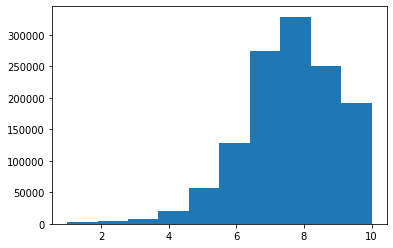

In [ ]:
plt.hist(y_test);

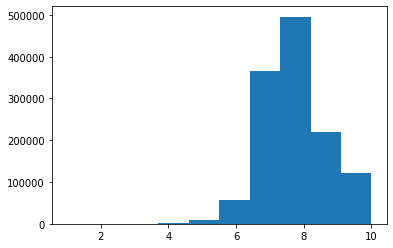

In [ ]:
plt.hist(y_test_knn);

In [ ]:
mean_squared_error(y_test_knn, y_test)

3.1432002392206706

**Случайный лес**

Регрессия

In [ ]:
rf = ensemble.RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=7)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

In [ ]:
y_test

5506191    9
7237456    8
946992     9
430149     9
4131273    7
          ..
5971223    7
7406203    7
1082815    9
1061611    8
1002754    8
Name: rating, Length: 1267449, dtype: int64

In [ ]:
len(y_test_rf)

1267449

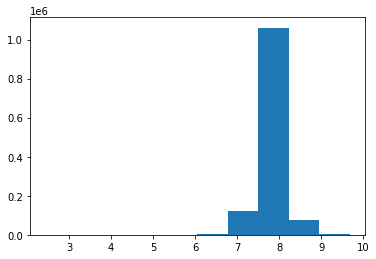

In [ ]:
plt.hist(y_test_rf);

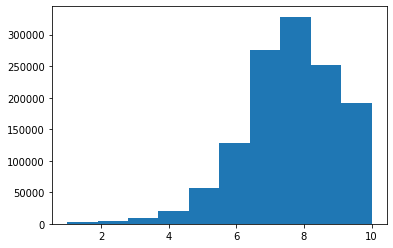

In [ ]:
plt.hist(y_test);

In [ ]:
print(f'Процент правильно угаданных ответов на обучающем множестве: {accuracy_score(y_train, y_train_pred)}')
print(f'Процент правильно угаданных ответов на тестовом множестве: {accuracy_score(y_test, y_test_pred)}')

Процент правильно угаданных ответов на обучающем множестве: 0.3488717091352071
Процент правильно угаданных ответов на тестовом множестве: 0.25077695433899116


In [ ]:
mean_squared_error(y_test_rf, y_test)

2.3689088689635716

Классификация

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_train_rf1 = model.predict(X_train)
y_test_rf1 = model.predict(X_test)

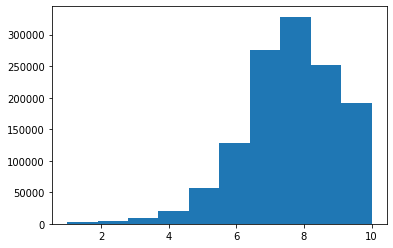

In [ ]:
plt.hist(y_test);

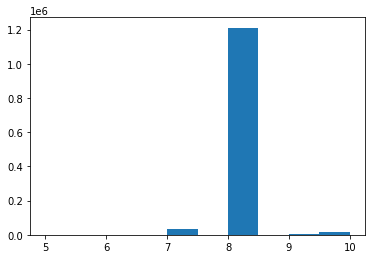

In [ ]:
plt.hist(y_test_rf1);

In [ ]:
y_test_rf1

array([ 8,  8, 10, ...,  8,  8,  8])

**Градиентный бустинг**

In [ ]:
gb = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=5, min_samples_split=10)

In [ ]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Обучалось два часа!

In [ ]:
y_test_gb = gb.predict(X_test)

In [ ]:
print(f'Процент правильно угаданных ответов на тестовом множестве: {accuracy_score(y_test, y_test_gb)}')

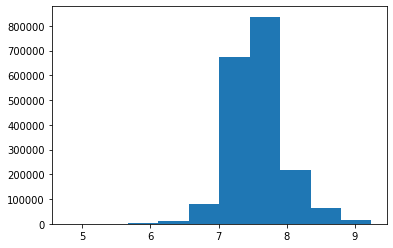

In [ ]:
plt.hist(y_test_gb);

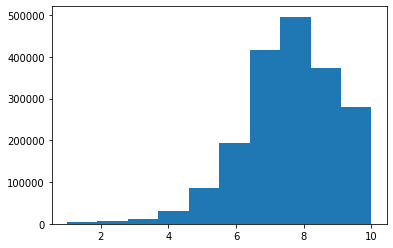

In [ ]:
plt.hist(y_test_true);

In [ ]:
mean_squared_error(y_test_gb, y_test_true)

2.2771462637398696

**Catboost**

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Подготовка данных**

In [ ]:
anime_df = pd.read_csv("/content/drive/MyDrive/Курс 3/Семестр6/CourseProject/asd/anime.csv")
rating_df = pd.read_csv("/content/drive/MyDrive/Курс 3/Семестр6/CourseProject/asd/rating.csv")

In [ ]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
anime_df.dropna(inplace=True)

In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [ ]:
df = pd.merge(anime_df, rating_df, on = 'anime_id')
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [ ]:
df.shape

(7813611, 9)

In [ ]:
df = df[df.rating_y != -1]
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10


In [ ]:
df.shape

(6337146, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337146 entries, 0 to 7813608
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   name      object 
 2   genre     object 
 3   type      object 
 4   episodes  object 
 5   rating_x  float64
 6   members   int64  
 7   user_id   int64  
 8   rating_y  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 483.5+ MB


In [ ]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    0
members     0
user_id     0
rating_y    0
dtype: int64

In [ ]:
df.drop('name', axis=1, inplace=True)

In [ ]:
#df.drop('genre', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337146 entries, 0 to 7813608
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   genre     object 
 2   type      object 
 3   episodes  object 
 4   rating_x  float64
 5   members   int64  
 6   user_id   int64  
 7   rating_y  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 435.1+ MB


In [ ]:
df = df.loc[df['episodes'] != 'Unknown']

In [ ]:
df.episodes = df.episodes.astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337144 entries, 0 to 7813608
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   genre     object 
 2   type      object 
 3   episodes  int64  
 4   rating_x  float64
 5   members   int64  
 6   user_id   int64  
 7   rating_y  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 435.1+ MB


In [ ]:
len(df.anime_id.unique())

9890

In [ ]:
y = df["rating_y"]
X = df.drop("rating_y", axis=1)

In [ ]:
X

,anime_id,genre,type,episodes,rating_x,members,user_id
0,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99
1,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152
2,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244
3,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271
5,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322
...,...,...,...,...,...,...,...
7813597,9316,Hentai,OVA,1,4.15,211,58483
7813600,5543,Hentai,OVA,1,4.28,183,49503
7813601,5543,Hentai,OVA,1,4.28,183,58483
7813604,5621,Hentai,OVA,4,4.88,219,49503


In [ ]:
y

0           5
1          10
2          10
3          10
5          10
           ..
7813597     1
7813600     4
7813601     1
7813604     6
7813608     4
Name: rating_y, Length: 6337144, dtype: int64

**Процесс**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
categorical_columns = [x for x in df.columns if df[x].dtype == 'object']
categorical_columns

['genre', 'type']

In [ ]:
model = CatBoostRegressor(iterations=500, depth=3, learning_rate=0.1, loss_function='RMSE', cat_features=categorical_columns, verbose=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((5703429, 7), (5703429,))

In [ ]:
model.fit(X_train, y_train)

0:	learn: 1.5505063	total: 1.9s	remaining: 15m 47s
1:	learn: 1.5323494	total: 3.6s	remaining: 14m 56s
2:	learn: 1.5171803	total: 5.09s	remaining: 14m 3s
3:	learn: 1.5043471	total: 6.67s	remaining: 13m 46s
4:	learn: 1.4936023	total: 8.07s	remaining: 13m 19s
5:	learn: 1.4845307	total: 9.57s	remaining: 13m 7s
6:	learn: 1.4768303	total: 11s	remaining: 12m 52s
7:	learn: 1.4704173	total: 12.5s	remaining: 12m 46s
8:	learn: 1.4650131	total: 14s	remaining: 12m 42s
9:	learn: 1.4604726	total: 15.5s	remaining: 12m 38s
10:	learn: 1.4567053	total: 16.9s	remaining: 12m 30s
11:	learn: 1.4533059	total: 18.2s	remaining: 12m 22s
12:	learn: 1.4506072	total: 19.7s	remaining: 12m 19s
13:	learn: 1.4481751	total: 21.2s	remaining: 12m 16s
14:	learn: 1.4461953	total: 22.6s	remaining: 12m 10s
15:	learn: 1.4444217	total: 24.1s	remaining: 12m 8s
16:	learn: 1.4429601	total: 25.6s	remaining: 12m 6s
17:	learn: 1.4417250	total: 27s	remaining: 12m 4s
18:	learn: 1.4406322	total: 28.4s	remaining: 11m 59s
19:	learn: 1.439

In [ ]:
catboost = model.predict(X_test)

In [ ]:
mean_squared_error(catboost, y_test)

2.0501550549951197

(array([1.10000e+02, 4.30000e+01, 3.98000e+02, 7.03000e+02, 3.15000e+03,
        2.09150e+04, 1.11200e+05, 2.74637e+05, 1.90862e+05, 3.16970e+04]),
 array([2.28084495, 3.00491853, 3.72899211, 4.45306569, 5.17713927,
        5.90121285, 6.62528643, 7.34936001, 8.07343359, 8.79750717,
        9.52158075]),
 <a list of 10 Patch objects>)

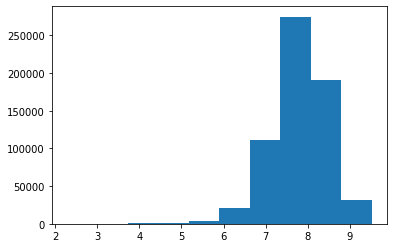

In [ ]:
plt.hist(catboost)

(array([  1674.,   2277.,   4204.,  10481.,  28026.,  64065., 137495.,
        164462., 125068.,  95963.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

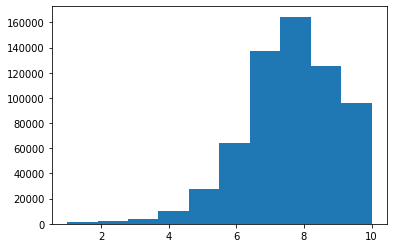

In [ ]:
plt.hist(y_test)